# Exploratory analysis of global CO2 emissions <br>
## by Sheila Alwanga Olayo

<a id="0"></a> <br>
## Table of contents

1. [Introduction](#1)
   1. [Data description](#2)
   2. [Questions for analysis](#3)
2. [Wrangling](#4)
3. [Analysis](#5)
   1. [A look at global emissions](#6)
   2. [A look at the top three polluting sectors by country](#7)
      1.[Coal](#8)
      2.[Oil](#9)
      3 [Gas](#10)
   3. [A look at total emissions by country](#11)
4. [Conclusions and recommendations](#12)

<a id="1"></a> 
## Introduction

<a id="2"></a> 
### Data description <br>
>This dataset used provides an in-depth look into the global CO2 emissions at the country-level, over 271 years, allowing for a better understanding of how much each country contributes to the global cumulative human impact on climate. It contains information on total emissions as well as from coal, oil, gas, cement production, flaring, and other sources. The data also provides a breakdown of per capita CO2 emissions per country - showing which countries are leading in pollution levels and identifying potential areas where reduction efforts should be concentrated.

<a id="3"></a> 
### Questions for analysis

. What is the general trend in global C02 emissions?<br>
. Which countries globally account for the highest C02 emissions?<br>
. What is the trend in emissions of these high polluting countries?<br>
. How do the various sectors contibute to CO2 emissions?<br>
. What is the trend in emissions for the various sectors?<br>


In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id="4"></a> 
## Wrangling

In [2]:
#reading file into data frame
emissions = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
emissions.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
emissions.tail()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423
63103,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699


In [4]:
emissions.sample(20)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
27477,Japan,JPN,1755,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,Anguilla,AIA,1902,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38342,Namibia,NAM,2012,3.355055,0.275102,2.857393,0.000000,0.222560,0.000000,NaN,1.547913
22336,Grenada,GRD,1782,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51911,Somalia,SOM,1981,0.274800,0.000000,0.274800,0.000000,0.000000,0.000000,NaN,0.046302
11712,Congo,COG,1766,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54333,Swaziland,SWZ,1955,0.003664,0.003664,0.000000,0.000000,0.000000,0.000000,NaN,0.011932
36575,Mongolia,MNG,1877,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35043,Marshall Islands,MHL,1977,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
32611,Luxembourg,LUX,1993,12.354764,5.735721,4.960647,1.160559,0.432346,0.000029,0.065463,31.144083


In [5]:
#checking number of rows and columns in the data frame
emissions.shape

(63104, 11)

In [6]:
#checking for column data types and number of null values
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [7]:
#checking for duplicate rows
sum(emissions.duplicated())

0

In [8]:
#listing the countries included in the data
emissions.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

It is worth noting that 'International Transport' and 'Global' are listed as part of the 'Country' column values.

In [9]:
#listing the years included in the data
emissions.Year.unique()

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

In [10]:
#renaming the columns to remove white space and convert all characters to lower case
emissions.rename(columns = lambda x: x.strip().lower(),inplace = True)

In [11]:
#renaming 'iso 3166-1 alpha-3' and 'per capita' columns
emissions.rename(columns = {'iso 3166-1 alpha-3':'country_code', 'per capita':'per_capita'},inplace=True)

In [12]:
emissions.columns

Index(['country', 'country_code', 'year', 'total', 'coal', 'oil', 'gas',
       'cement', 'flaring', 'other', 'per_capita'],
      dtype='object')

<a id="5"></a> 
## Analysis

<a id="6"></a> 
### A look at global emissions

In [13]:
#creating a new data frame that only consists global emission records
global_emissions = emissions.query('country =="Global"')

In [14]:
global_emissions

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,per_capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [15]:
#summary statistics for global emissions
global_emissions.describe()

,year,total,coal,oil,gas,cement,flaring,other,per_capita
count,272.000000,272.000000,272.000000,167.000000,140.000000,142.000000,72.000000,32.000000,272.000000
mean,1885.500000,6385.772167,2956.581079,3625.609201,1814.698722,317.372713,256.309522,251.782569,1.494845
std,78.663842,10124.917164,3944.631584,4430.704084,2326.854738,453.690038,114.017646,35.326736,1.671295
min,1750.000000,9.350528,9.350528,0.036640,0.164880,0.000172,73.624416,213.078023,0.011249
25%,1817.750000,49.590408,49.590408,54.051075,36.137395,0.148120,159.925039,220.089699,0.046184
50%,1885.500000,1017.573406,991.485678,821.515974,431.635690,71.409084,250.638025,242.685408,0.669270
75%,1953.250000,6683.314570,4047.788751,8443.334578,3167.370656,435.955032,371.228432,294.627295,2.518943
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,4.887984


>From the summary statistics, the highest ever recorded volume of global CO2 emissions was in **2021** at **37,123.850 Mt** aprroximately **4000 times** more than the lowest which was in **1750**, presumably before the boom of the industrial age, at **9.35 Mt**. Between 1750 and 2021, the **global average** CO2 emissions were **6,385.772 Mt**.

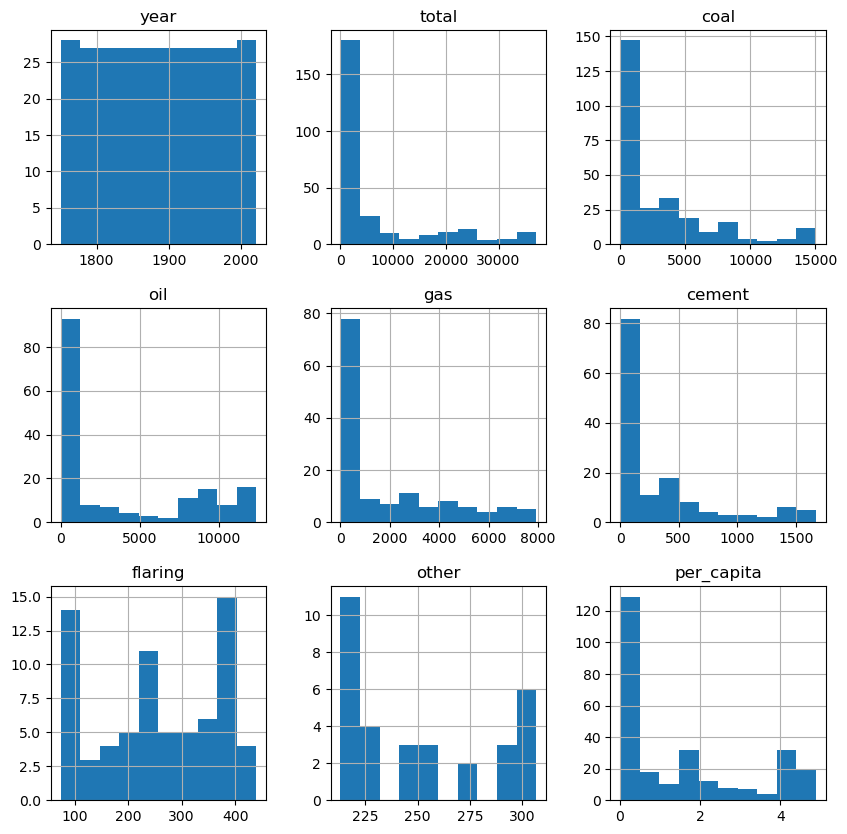

In [16]:
global_emissions.hist(figsize = (10,10));

Majority of the distributions appear to be right skewed, with the exception of **flaring** and **other**.

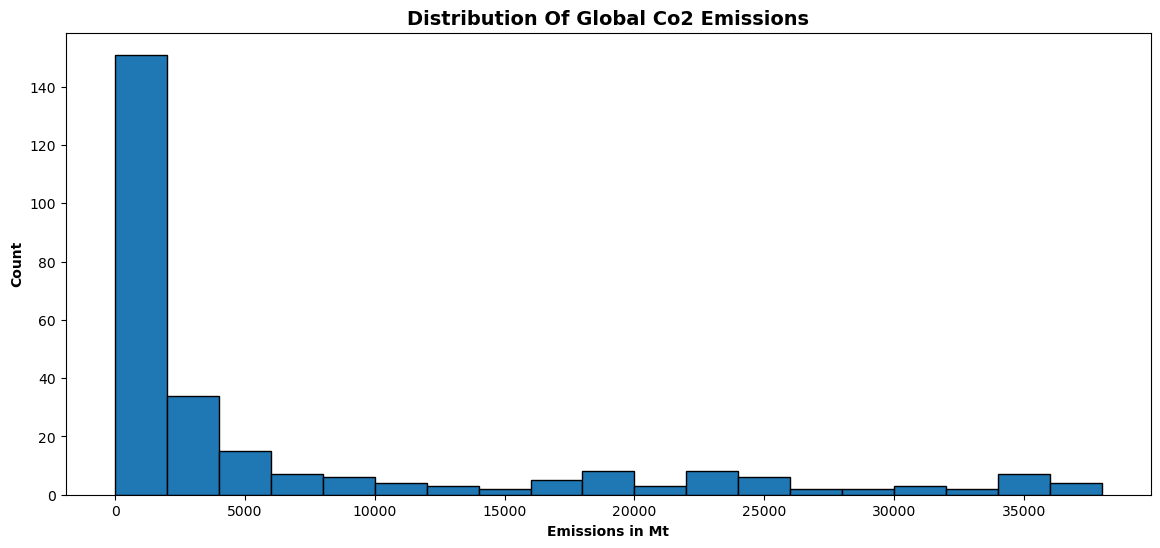

In [17]:
#plotting the distribution of global Co2 emissions
plt.figure(figsize=[14,6])
bins=np.arange(0,global_emissions['total'].max()+2000, 2000)
plt.hist(data=global_emissions, x='total',bins=bins, edgecolor='black')
plt.title('Distribution of global CO2 emissions'.title(), fontsize=14,weight='bold')
plt.xlabel('Emissions in Mt',fontsize=10, weight='bold')
plt.ylabel('Count',fontsize=10, weight='bold')
plt.plot();

>Plotting a histogram of global emissions shows a right skewed distribution with majority of emissions lying in the 0-2000 Mt range.There is a steep drop then gradual tapering off of the graph from there on out with slight peaks in the middle and towards the end.

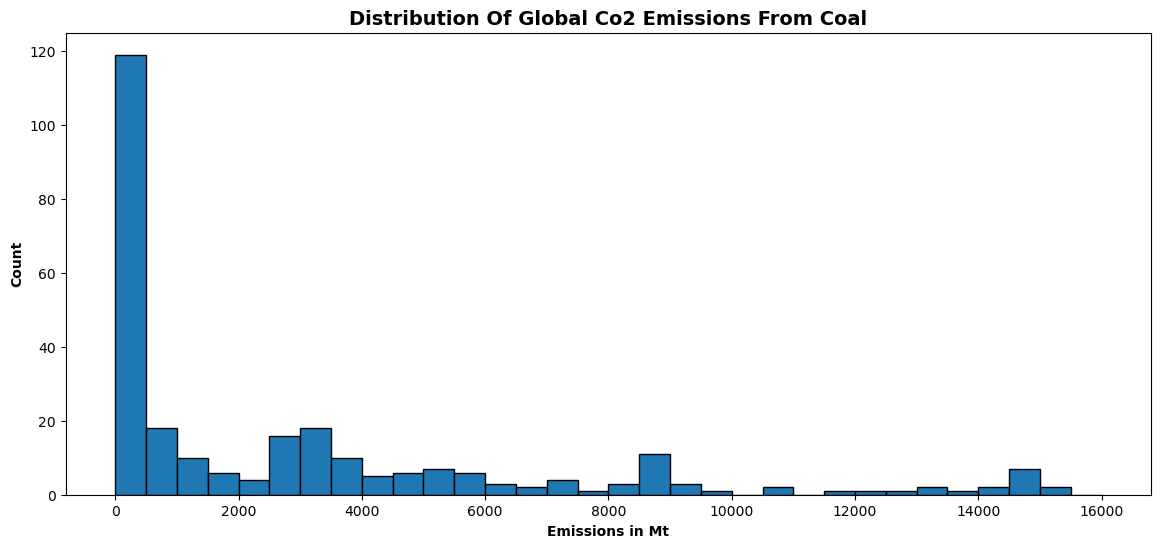

In [18]:
#plotting the distribution of global Co2 emissions from coal
plt.figure(figsize=[14,6])
bins=np.arange(0,global_emissions['coal'].max()+1000, 500)
plt.hist(data=global_emissions, x='coal',bins=bins, edgecolor='black')
plt.title('Distribution of global CO2 emissions from coal'.title(), fontsize=14,weight='bold')
plt.xlabel('Emissions in Mt',fontsize=10, weight='bold')
plt.ylabel('Count',fontsize=10, weight='bold')
plt.plot();

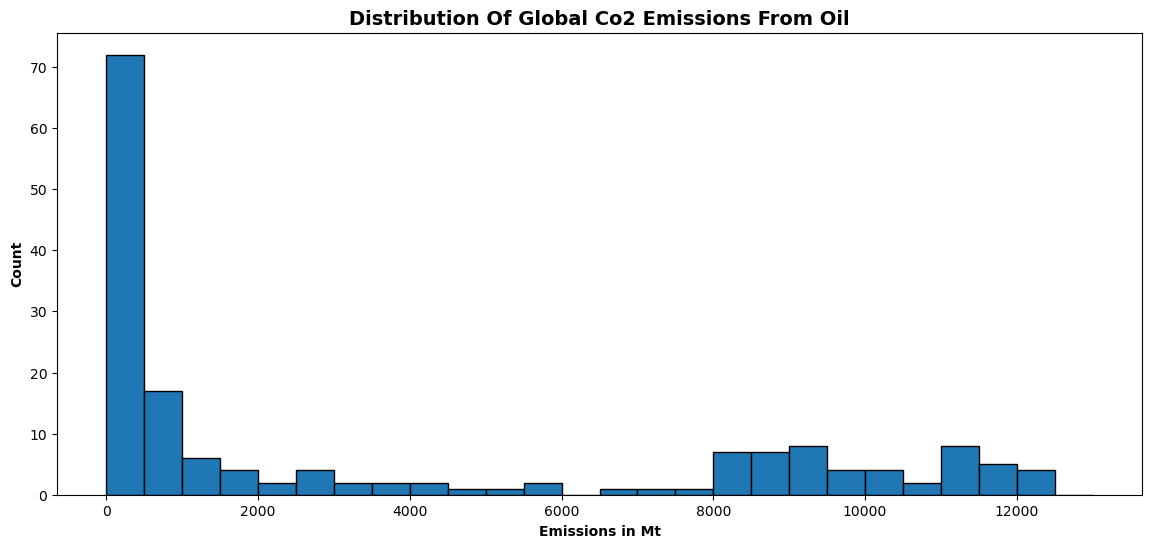

In [19]:
#plotting the distribution of global Co2 emissions from oil
plt.figure(figsize=[14,6])
bins=np.arange(0,global_emissions['oil'].max()+1000, 500)
plt.hist(data=global_emissions, x='oil',bins=bins, edgecolor='black')
plt.title('Distribution of global CO2 emissions from oil'.title(), fontsize=14,weight='bold')
plt.xlabel('Emissions in Mt',fontsize=10, weight='bold')
plt.ylabel('Count',fontsize=10, weight='bold')
plt.plot();

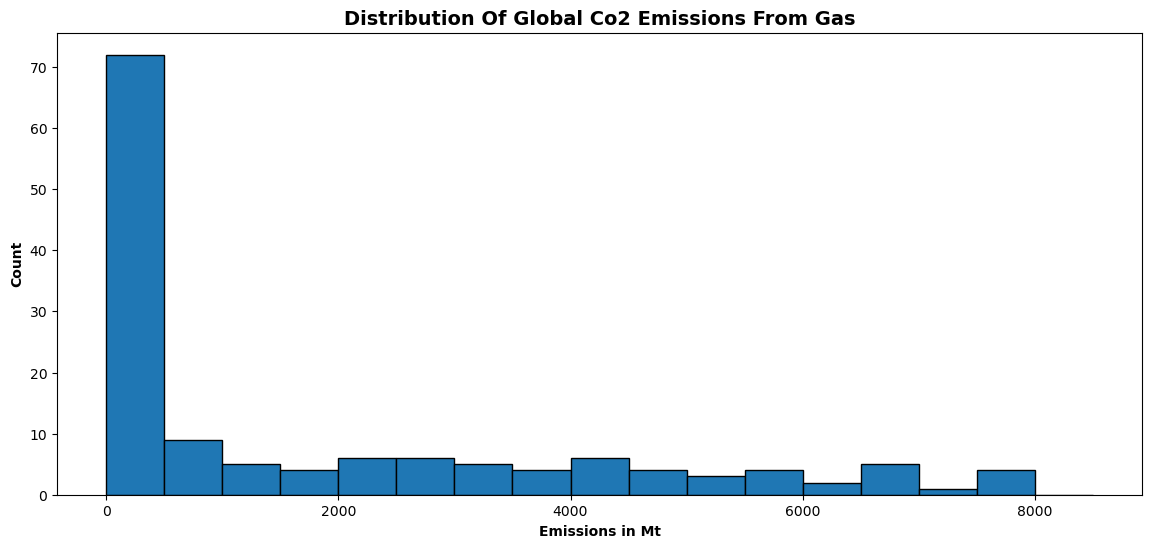

In [20]:
#plotting the distribution of global Co2 emissions from gas
plt.figure(figsize=[14,6])
bins=np.arange(0,global_emissions['gas'].max()+1000, 500)
plt.hist(data=global_emissions, x='gas',bins=bins, edgecolor='black')
plt.title('Distribution of global CO2 emissions from gas'.title(), fontsize=14,weight='bold')
plt.xlabel('Emissions in Mt',fontsize=10, weight='bold')
plt.ylabel('Count',fontsize=10, weight='bold')
plt.plot();

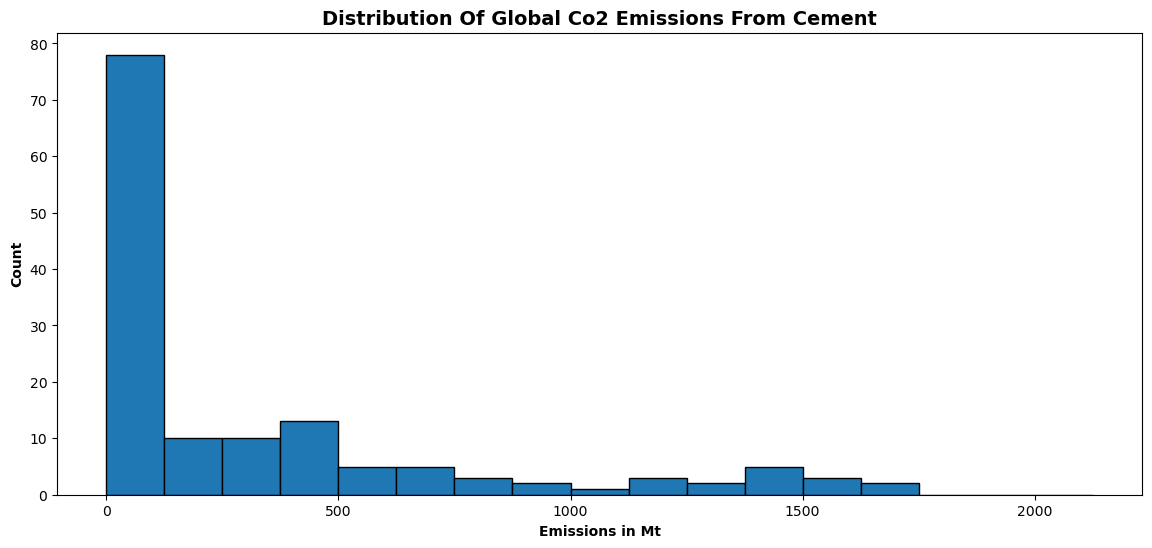

In [21]:
#plotting the distribution of global Co2 emissions from cement
plt.figure(figsize=[14,6])
bins=np.arange(0,global_emissions['cement'].max()+500, 125)
plt.hist(data=global_emissions, x='cement',bins=bins, edgecolor='black')
plt.title('Distribution of global CO2 emissions from cement'.title(), fontsize=14,weight='bold')
plt.xlabel('Emissions in Mt',fontsize=10, weight='bold')
plt.ylabel('Count',fontsize=10, weight='bold')
plt.plot();

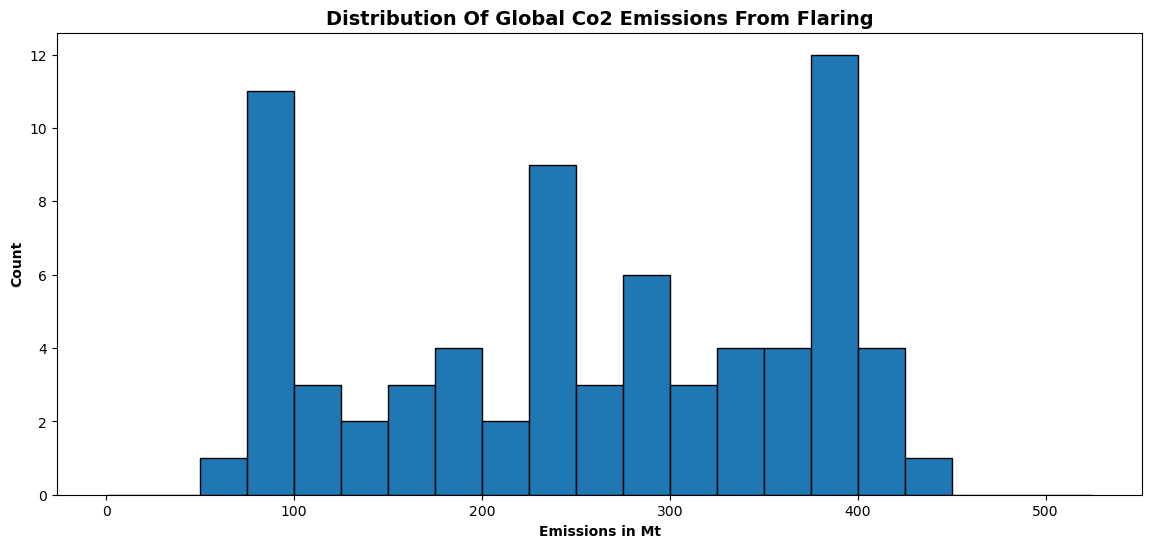

In [22]:
#plotting the distribution of global Co2 emissions from flaring
plt.figure(figsize=[14,6])
bins=np.arange(0,global_emissions['flaring'].max()+100, 25)
plt.hist(data=global_emissions, x='flaring',bins=bins, edgecolor='black')
plt.title('Distribution of global CO2 emissions from flaring'.title(), fontsize=14,weight='bold')
plt.xlabel('Emissions in Mt',fontsize=10, weight='bold')
plt.ylabel('Count',fontsize=10, weight='bold')
plt.plot();

>Histograms plotted for total global Co2 emissions and Co2 emissions from coal, oil, gas and cement sectors all show right skewed distributions. Overall, majority of total emissions lie in the 0-2000 Mt range. For coal, oil and gas sectors, majority of the emissions are in the 0-500 Mt range while for the cement sector, the majority of emissions lie  in the 0-250 Mt range, which is relatively less. <br>
>The distribution of Co2 emissions from flaring is unlike the others, multimodal with peaks on both ends and the middle. A large number of emissions lie in the 75-100 Mt range and the 375-400 Mt range.

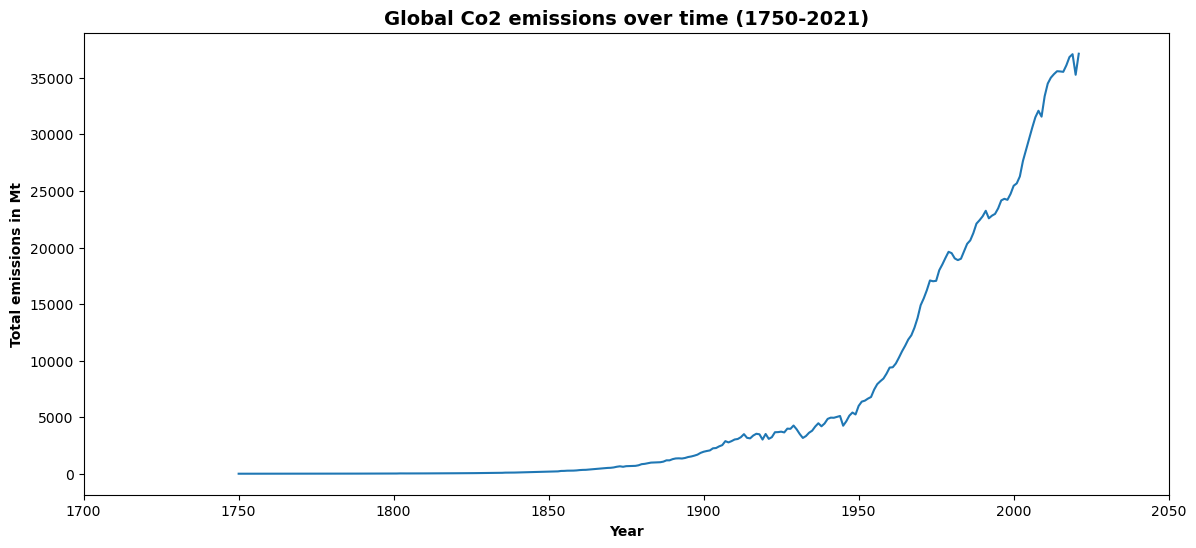

In [23]:
#plotting a line graph to show the trend in global emissions
global_emissions
x=global_emissions.year
y=global_emissions.total
plt.figure(figsize = [14,6])
plt.xlim(1700, 2050)
plt.title('Global Co2 emissions over time (1750-2021)',fontsize=14,weight='bold')
plt.xlabel('Year',fontsize=10, weight='bold')
plt.ylabel('Total emissions in Mt', fontsize=10, weight='bold')
plt.plot(x,y);

>As expected, the line graph depicts a steady rise in global Co2 emissions in the 271 year period. The rise begins in the late 1800's which could be attributed to the peak of the industrial revolution that prompted largescale use of coal. There's a steep incline around the 1960's probably due to increased industrialization, urbanization and populations, which sets the tone for the following years as Co2 emissions are observed to be rising steadily with only minor dips as interruptions.

In [24]:
#filtering out global emission data to include the only the last decade 
decade_global_emissions = global_emissions.query('year > 2010')

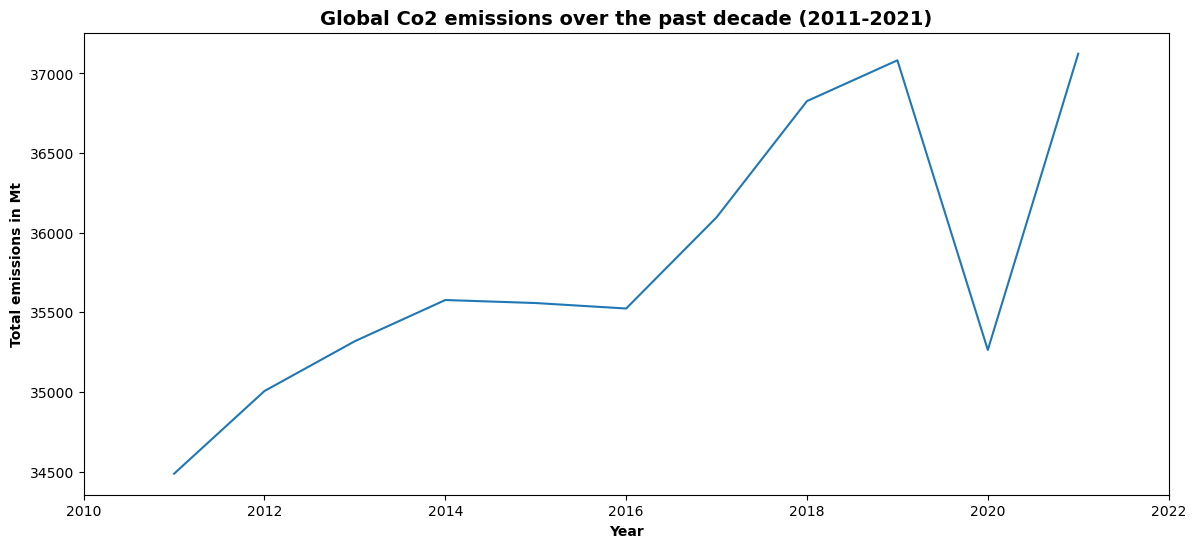

In [25]:
#plotting a line graph to show the trend in global emissions over the last decade
x=decade_global_emissions.year
y=decade_global_emissions.total
plt.figure(figsize = [14,6])
plt.xlim(2010,2022)
plt.title('Global Co2 emissions over the past decade (2011-2021)',fontsize=14,weight='bold')
plt.xlabel('Year',fontsize=10, weight='bold')
plt.ylabel('Total emissions in Mt', fontsize=10, weight='bold')
plt.plot(x,y);

>Plotting global Co2 emissions for the past decade shows a rising trend between the 2011 and 2014 marks at which point there's a very slight reduction in Co2 emissions. This however gives way to a sharp increase between 2016 and 2019. There's a notable drop at the 2020 mark which brought emissions close to 2013 levels, this of course being due to the COVID-19 pandemic that slowed things down including travel and industry. Homever, the reduced emissions do not last long as the graph depicts an equally steep rise of emissions in 2021, reaching the highest levels yet.

In [26]:
global_emissions.columns

Index(['country', 'country_code', 'year', 'total', 'coal', 'oil', 'gas',
       'cement', 'flaring', 'other', 'per_capita'],
      dtype='object')

In [27]:
#creating a data frame that only consists industry emission records
industry_emissions = global_emissions.drop(['country', 'country_code', 'year','total','per_capita'], axis = 1)
industry_emissions.head()

,coal,oil,gas,cement,flaring,other
62832,9.350528,NaN,NaN,NaN,NaN,NaN
62833,9.350528,NaN,NaN,NaN,NaN,NaN
62834,9.354192,NaN,NaN,NaN,NaN,NaN
62835,9.354192,NaN,NaN,NaN,NaN,NaN
62836,9.357856,NaN,NaN,NaN,NaN,NaN


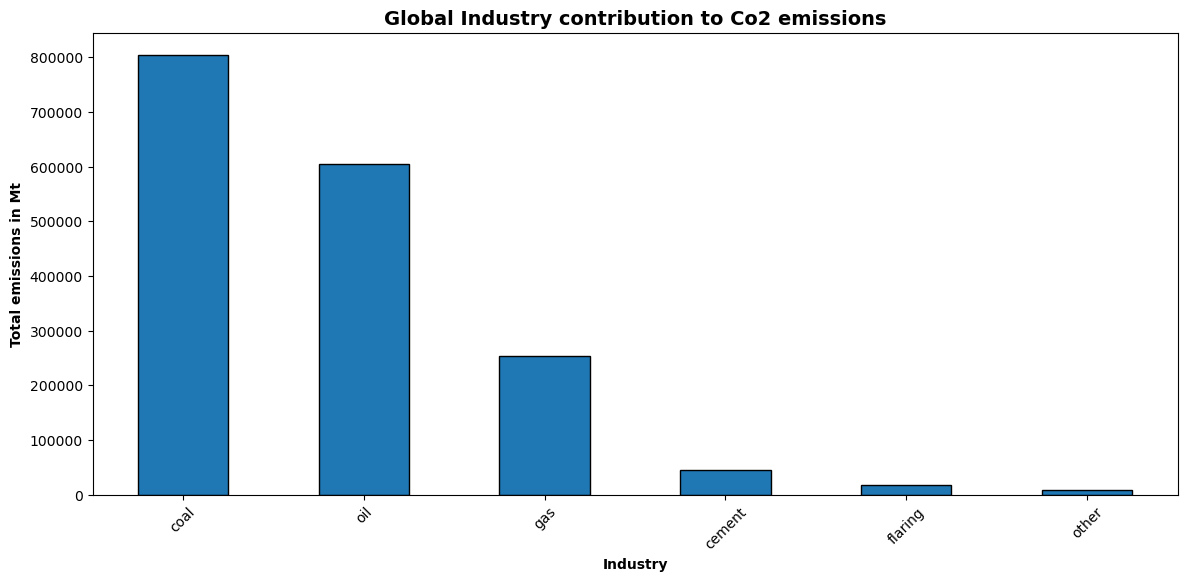

In [28]:
#plotting bargraph to show each sector's contribution to Co2 emissions
plt.figure(figsize = [14,6])
industry_emissions.sum().plot(kind='bar',edgecolor='black')
plt.title('Global Industry contribution to Co2 emissions',fontsize=14,weight='bold')
plt.xlabel('Industry',fontsize=10,weight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total emissions in Mt',fontsize=10,weight='bold');

>The bar graph shows fossil fuel sectors as the biggest contributors to Co2 emissions with coal being at the top, followed closely by oil then a little further down natural gas. 800,000 Mt of Co2 emissions can be attributed to coal over the past 271 years while Oil has contributed 600,000 Mt and gas approximately 250,000 Mt which is notabley less compared to the first two. Other industries including cement and flaring are relatively low polluters.

In [29]:
#creating a dataframe that only consists industry emission records with the year as the index column for time-series plot
annual_industry_emissions = global_emissions.drop(['country', 'country_code','total','per_capita'], axis = 1)
annual_industry_emissions.set_index('year',inplace=True)
annual_industry_emissions.head()

,coal,oil,gas,cement,flaring,other
year,,,,,,
1750,9.350528,NaN,NaN,NaN,NaN,NaN
1751,9.350528,NaN,NaN,NaN,NaN,NaN
1752,9.354192,NaN,NaN,NaN,NaN,NaN
1753,9.354192,NaN,NaN,NaN,NaN,NaN
1754,9.357856,NaN,NaN,NaN,NaN,NaN


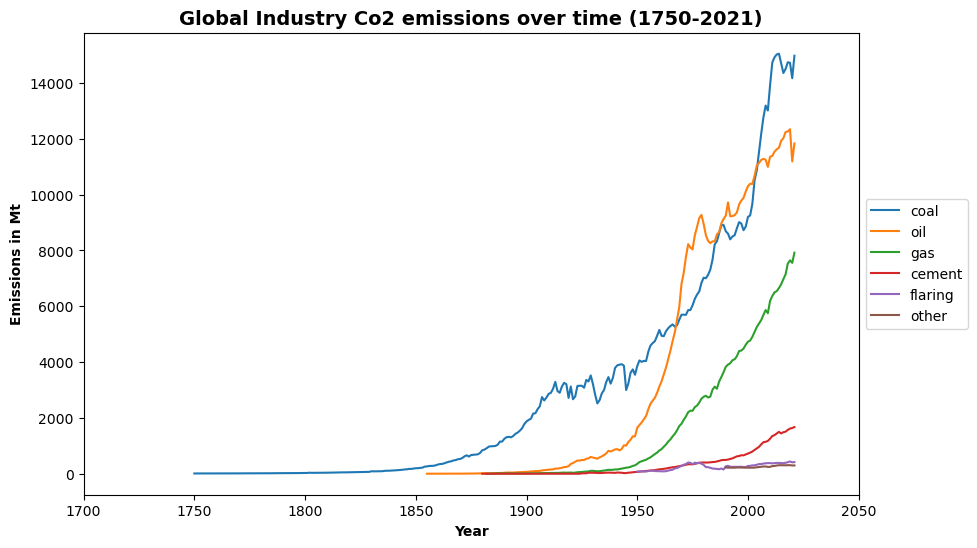

In [30]:
#plotting a line graph to show industry emissions over time
plt.figure(figsize=[10,6])
plt.plot(annual_industry_emissions.coal,label = 'coal')
plt.plot(annual_industry_emissions.oil,label = 'oil')
plt.plot(annual_industry_emissions.gas,label = 'gas')
plt.plot(annual_industry_emissions.cement,label = 'cement')
plt.plot(annual_industry_emissions.flaring,label = 'flaring')
plt.plot(annual_industry_emissions.other,label = 'other')
plt.ylabel('Emissions in Mt',fontsize=10, weight='bold')
plt.xlabel('Year', fontsize=10, weight='bold')
plt.xlim(1700, 2050)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Global Industry Co2 emissions over time (1750-2021)', fontsize=14,weight='bold');

> Next, I will plot a line graph of industry emissions over time from 1901 when all the sectors had gotten active to 2021 to compare the trends in their emission levels over time.

In [31]:
#plotting a line graph to show industry emissions over the last 121 years
centuary_annual_industry_emissions = annual_industry_emissions.query('year > 1900')

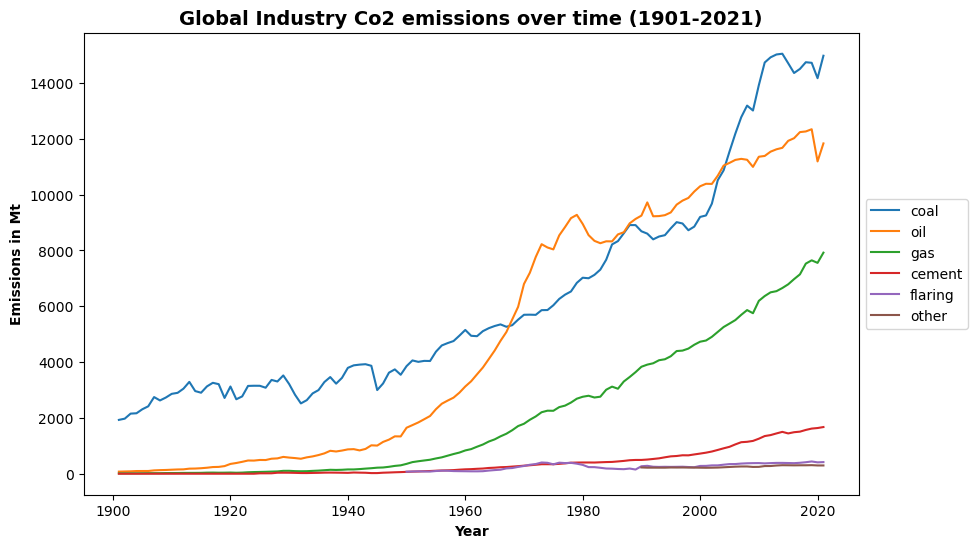

In [32]:
#plotting a line graph to show industry emissions over the last 121 years
plt.figure(figsize=[10,6])
plt.plot(centuary_annual_industry_emissions.coal,label = 'coal')
plt.plot(centuary_annual_industry_emissions.oil,label = 'oil')
plt.plot(centuary_annual_industry_emissions.gas,label = 'gas')
plt.plot(centuary_annual_industry_emissions.cement,label = 'cement')
plt.plot(centuary_annual_industry_emissions.flaring,label = 'flaring')
plt.plot(centuary_annual_industry_emissions.other,label = 'other')
plt.ylabel('Emissions in Mt',fontsize=10, weight='bold')
plt.xlabel('Year', fontsize=10, weight='bold')
#plt.xlim(1700, 2050)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Global Industry Co2 emissions over time (1901-2021)', fontsize=14,weight='bold');


> Coal is noted to have been an early contributer to Co2 emissions, possibly due to being more readily available early on as compared to oil or gas. The other industries however show a steady increase with oil even overtaking coal in Co2 emissions in the 1970's and 1980's. This could be attributed to the rise of the automobile industry that relied on petroleum based fuel and the increased availability of natural gas for use in industry.

<a id="7"></a> 
### A look at the top three polluting sectors by country

<a id="8"></a> 
### Coal

In [33]:
#creating a dataframe to include emission records by countries for each sector.
country_emissions = emissions.query('country != "Global" and country != "International Transport"') 

In [34]:
country_emissions

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,per_capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62555,Zimbabwe,ZWE,2017,9.596071,5.900452,3.226752,0.0,0.468867,0.0,NaN,0.650533
62556,Zimbabwe,ZWE,2018,11.795478,7.177776,4.059712,0.0,0.557990,0.0,NaN,0.783639
62557,Zimbabwe,ZWE,2019,11.114607,6.888320,3.656672,0.0,0.569615,0.0,NaN,0.723861
62558,Zimbabwe,ZWE,2020,10.607897,6.721571,3.316712,0.0,0.569615,0.0,NaN,0.676970


In [35]:
coal_emissions = country_emissions.groupby('country')['coal'].sum().sort_values().tail(10).to_frame()
coal_emissions

,coal
country,
South Africa,18534.971906
France,19078.952503
Poland,23198.407184
Japan,24175.925122
India,37018.082763
Russia,45571.473160
United Kingdom,56850.597464
Germany,64665.842957
USA,175444.989793


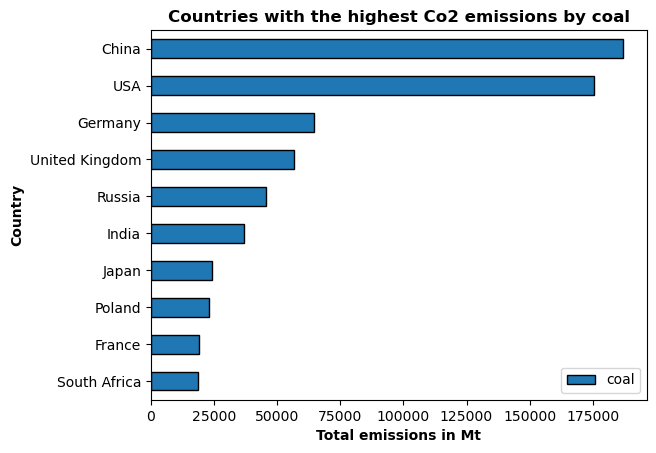

In [36]:
#barplot of coal emissions
coal_emissions.plot(kind = 'barh',edgecolor='black');
plt.title('Countries with the highest Co2 emissions by coal', fontsize=12, weight='bold');
plt.xlabel('Total emissions in Mt', fontsize=10,weight='bold');
plt.ylabel('Country', fontsize=10, weight='bold');

>This plot has China at the top with 187,000 Mt worth of Co2 emissions from coal. The United Staes comes a close second with 175,000 Mt. South Africa is the 10th and only African country on the list having 18,000 Mt worth of Co2 emissions from coal.

<a id="9"></a> 
### Oil

In [37]:
oil_emissions = country_emissions.groupby('country')['oil'].sum().sort_values().tail(10).to_frame()
oil_emissions

,oil
country,
United Kingdom,13545.630168
Italy,13635.770741
India,14798.262507
Canada,15031.196429
France,15350.881978
Germany,19852.714039
Japan,33153.129977
Russia,33219.817986
China,34491.543227


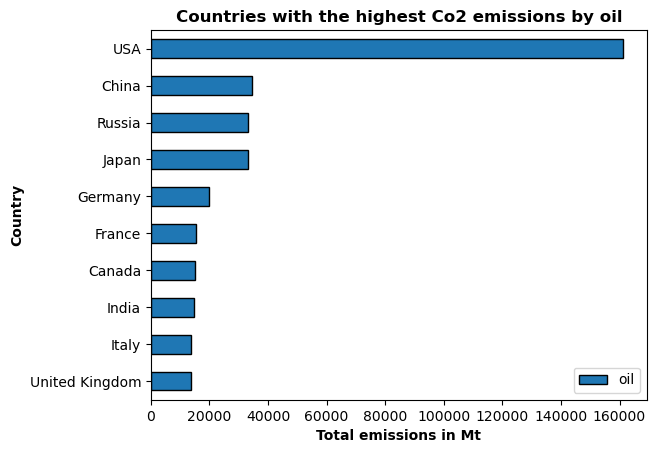

In [38]:
oil_emissions.plot(kind='barh',edgecolor='black')
plt.title('Countries with the highest Co2 emissions by oil', fontsize=12,weight='bold');
plt.xlabel('Total emissions in Mt',fontsize=10,weight='bold');
plt.ylabel('Country',fontsize=10, weight='bold');

>The United States appears to be the single largest contributor of Co2 emissions from oil at 160,000 Mt. China, Russia and Japan which are the coulntries that follow have significantly less volumes starting from 34,000 Mt and below.

<a id="10"></a> 
### Gas

In [39]:
gas_emissions = country_emissions.groupby('country')['gas'].sum().sort_values().tail(10).to_frame()
gas_emissions

,gas
country,
Italy,5507.858792
Ukraine,6293.957671
Japan,7061.825160
China,7162.011417
Germany,7177.257730
United Kingdom,7183.232055
Iran,7512.388398
Canada,8278.287605
Russia,35054.214393


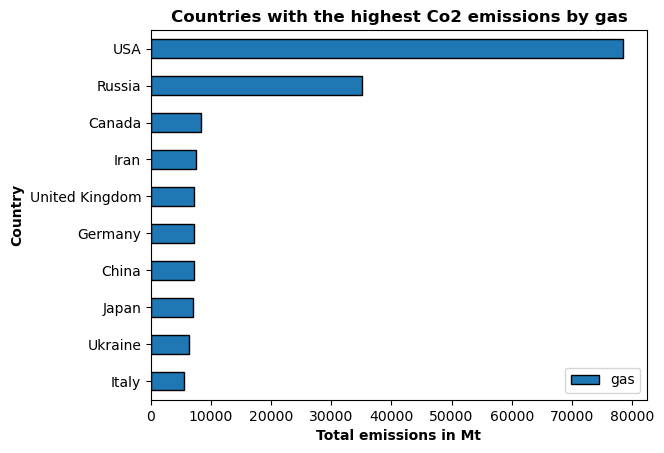

In [40]:
gas_emissions.plot(kind='barh',edgecolor='black');
plt.title('Countries with the highest Co2 emissions by gas',fontsize=12,weight='bold');
plt.xlabel('Total emissions in Mt',fontsize=10,weight='bold')
plt.ylabel('Country',fontsize=10,weight='bold');

>The United States comes first in Co2 emissions from gas as well, having close to 80,000 Mt of emissions. Russia comes second in this list at approximately half that amount. The following 8 countries in the top 10 list have significantly less volumes of emissions. Iran comes fourth with 7,500 Mt and Ukraine comes eighth with aproximately 6,000 Mt, this being the only time being listed as top Co2 contributors.

<a id="11"></a> 
### A look at total emissions by country

In [41]:
country_emissions = emissions.query('country != "Global" and country != "International Transport"')  

In [42]:
#saving to csv file for further visualization on Tableau
country_emissions.to_csv('Country_emissions.csv',index=False, header=True)

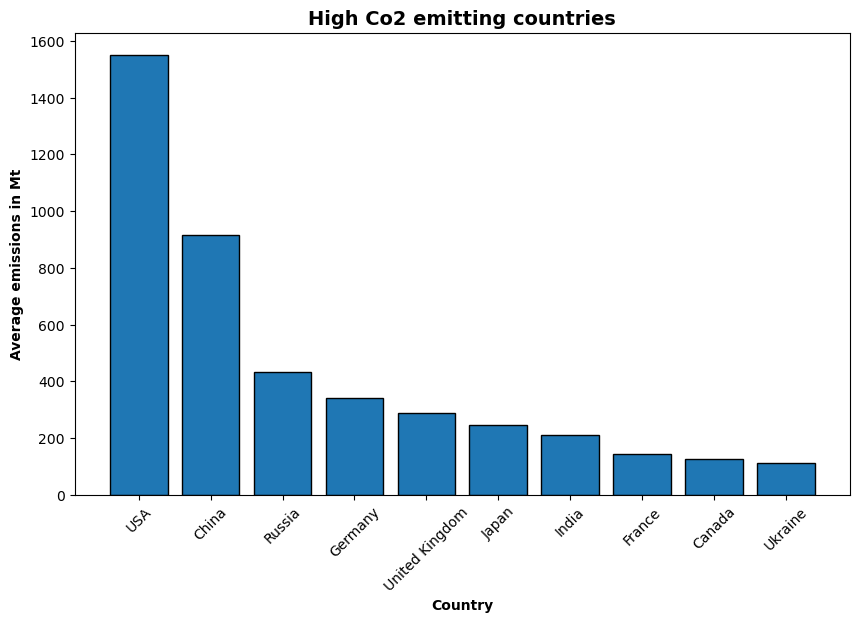

In [43]:
#plotting a bar grapg of countries with the highest average emissions
ave_emissions = country_emissions.groupby('country', as_index = False)['total'].mean().sort_values(by=['total'], ascending = False).head(10)
x = ave_emissions.country
y = ave_emissions.total
plt.figure(figsize = [10,6])
plt.title('High Co2 emitting countries', fontsize =14, weight='bold')
plt.xlabel('Country',fontsize = 10, weight='bold')
plt.ylabel('Average emissions in Mt',fontsize = 10, weight='bold')
plt.xticks(rotation = 45)
plt.bar(x,y, edgecolor = 'black');

>The United States and China have notabely high average Co2 emissions and are the top two countries with the highest emissions respectively. They are then followed by Russia, Germany, United Kingdom, Japan, India, France Canada and lastly Ukraine in that order. 

In [44]:
#plottig a graph to show the trends in country emissions for countries with the highest average emissions
countries =['USA','China','Russia','Germany','United Kingdom']

top_countries = country_emissions[country_emissions.country.isin(countries) == True]
annual_country_emissions = top_countries.query('year > 1900')
annual_country_emissions

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,per_capita
10759,China,CHN,1901,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10760,China,CHN,1902,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
10761,China,CHN,1903,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
10762,China,CHN,1904,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
10763,China,CHN,1905,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
60107,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


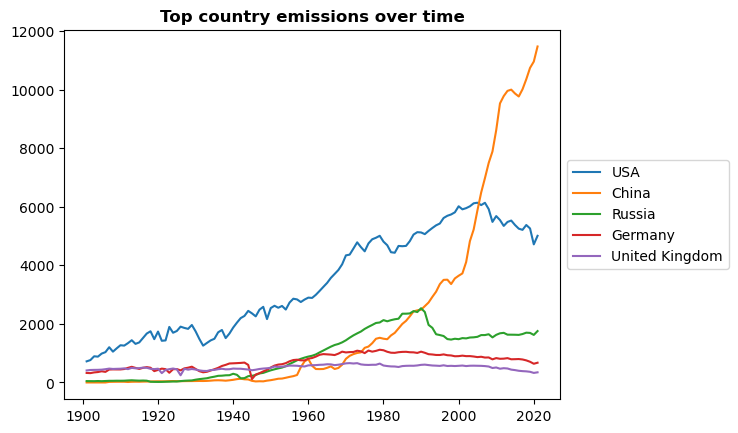

In [45]:
#plottig a graph to show the trends in country emissions for countries with the highest average emissions
x  = annual_country_emissions.year.unique()
y1 = annual_country_emissions.query('country == "USA"').total
y2 = annual_country_emissions.query('country == "China"').total
y3 = annual_country_emissions.query('country == "Russia"').total
y4 = annual_country_emissions.query('country == "Germany"').total
y5 = annual_country_emissions.query('country == "United Kingdom"').total

plt.plot(x,y1,label='USA')
plt.plot(x,y2,label='China')
plt.plot(x,y3,label='Russia')
plt.plot(x,y4,label='Germany')
plt.plot(x,y5,label='United Kingdom')
plt.title('Top country emissions over time', fontsize = 12, weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

>Looking at the trend of emissions by the top 5 countries, the immediate observation is China's significant increase in Co2 emissions from the 1900's to 2021. Even though the USA has the highest records overall, as of 2021, China's Co2 emissions were close to three times that of the USA. The graph indicates a steady rise in Co2 emissions from China from the 1940's. This accelarates through out the 1990's and a steep rise is seen from around 2003. Between 2004 and 2021, China's Co2 emissions grew from just under 4000 Mt to close to 12000 Mt. <br/>
>The USA being the country with the highest total Co2 emissions, shows a steady increase in emissions over time, reaching the peak at just under 6000 Mt around 2007/2008 after which the levels of emissions are seen to be on an overall downward trend with a few slight peaks and dips in between.<br/>
>Russia shows a notable rise in Co2 emissions between 1940 and 1990 at which point the emissions were at 2400 Mt.Which is the all time high. After this, there was a significant reduction in the amount of Co2 emissions and Russia has maintained almost steady levels showing only very slight increments.<br/>
> Germany and the United Kingdom show almost similar graphs with a notable variation in the mid 1940's at which point there was a sharp drop and equally sharp rise in the levels of Co2 emissions from Germany. Although Germany has slightly higher levels of Co2 emissions than the United Kingdom, both countries show very similar trends and in the 121 year period show almost the same levels of Co2 emissions in 2021 as they did in 1900.

In [92]:
%%HTML
<div class='tableauPlaceholder' id='viz1684463672611' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Di&#47;DistributionofglobalCo2emissions&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DistributionofglobalCo2emissions&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Di&#47;DistributionofglobalCo2emissions&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1684463672611');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

> The map gives a visual depiction of the distribution of Co2 emissions globally.

<a id="12"></a> 
## Conclusion and Recommendations

>The levels of Co2 emissions globally are increasing rapidly each year. Burning of coal is the major contributor to the numbers that are being seen. Developed nations are responsible for majority of the recorded emissions. China as a nation is recording very high levels of Co2 emissions that are increasing at a steep rate. Developed and developing nations need to check their levels of pollution and implement use of alternative energy sources.